   ID_Cliente  Edad Genero        Producto  Precio  Cantidad  \
0           1    58      F        Martillo  101.85         1   
1           2    20      F        Alicates  174.07         1   
2           3    45      M  Destornillador  121.86         4   
3           4    27      F        Alicates   81.31         7   
4           5    52      F  Destornillador   64.30         1   

   Dias_Desde_Ultima_Compra  Total_Compras  Descuento_Aplicado  Compra_Futura  
0                       115             48                   1              1  
1                       142             20                   0              1  
2                       200             39                   1              1  
3                       179              2                   0              0  
4                       201              1                   1              0  
Regresión Logística Accuracy: 0.55
              precision    recall  f1-score   support

           0       0.45      0.09      0.16  

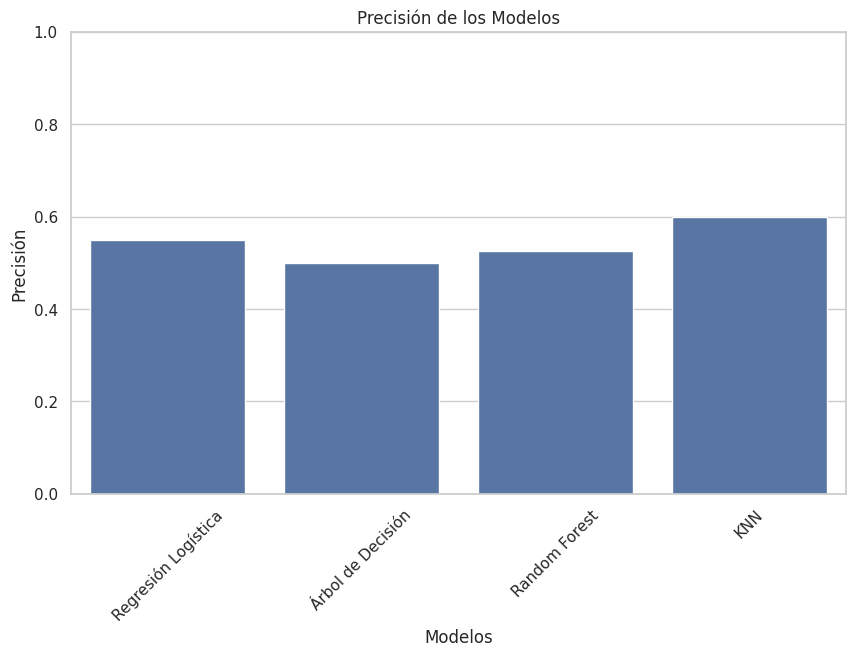

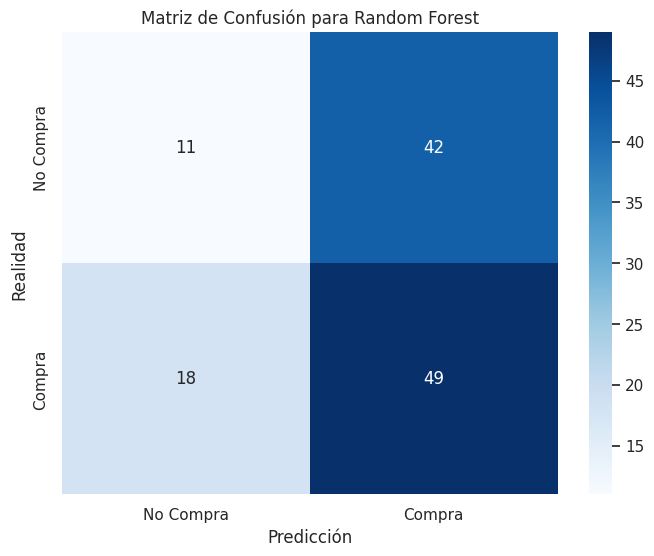

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Cargar el dataset
df = pd.read_csv('ferreteria_dataset_large.csv')

# Verificar la estructura del dataset
print(df.head())

# Convertir el género a variables dummy
df['Genero'] = df['Genero'].map({'M': 1, 'F': 0})

# Seleccionar las características y la etiqueta objetivo
X = df[['Edad', 'Genero', 'Precio', 'Cantidad', 'Dias_Desde_Ultima_Compra', 'Total_Compras', 'Descuento_Aplicado']]
y = df['Compra_Futura']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Inicializar los modelos
models = {
    'Regresión Logística': LogisticRegression(),
    'Árbol de Decisión': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

# Entrenar y evaluar cada modelo
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f'{name} Accuracy: {accuracy:.2f}')
    print(classification_report(y_test, y_pred))

# Visualizar resultados
plt.figure(figsize=(10, 6))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.title('Precisión de los Modelos')
plt.ylabel('Precisión')
plt.xlabel('Modelos')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()

# Matriz de confusión para el mejor modelo (por ejemplo, Random Forest)
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred_best = best_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
             xticklabels=['No Compra', 'Compra'],
             yticklabels=['No Compra', 'Compra'])
plt.title('Matriz de Confusión para Random Forest')
plt.xlabel('Predicción')
plt.ylabel('Realidad')
plt.show()


   ID_Cliente  Edad Genero        Producto  Precio  Cantidad  \
0           1    58      F        Martillo  101.85         1   
1           2    20      F        Alicates  174.07         1   
2           3    45      M  Destornillador  121.86         4   
3           4    27      F        Alicates   81.31         7   
4           5    52      F  Destornillador   64.30         1   

   Dias_Desde_Ultima_Compra  Total_Compras  Descuento_Aplicado  Compra_Futura  
0                       115             48                   1              1  
1                       142             20                   0              1  
2                       200             39                   1              1  
3                       179              2                   0              0  
4                       201              1                   1              0  


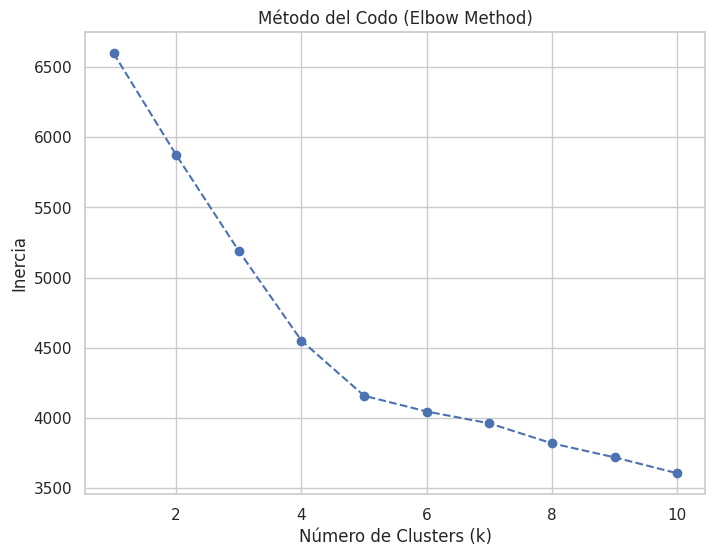

Cluster
1    375
0    128
2     97
Name: count, dtype: int64


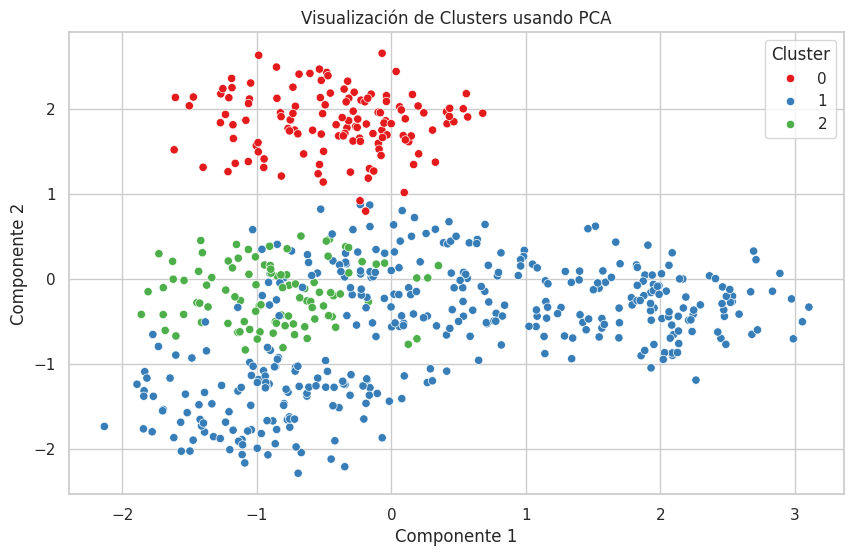


Centroides de los clusters:
       Edad    Genero    Precio  Cantidad  Dias_Desde_Ultima_Compra  \
0  0.003515  0.137672  0.055367 -0.021149                 -0.134706   
1 -0.029935 -0.020693 -0.034350  0.034031                  0.050181   
2  0.111089 -0.101674  0.059734 -0.103657                 -0.016240   

   Total_Compras  Descuento_Aplicado  Producto_Destornillador  \
0       0.079204           -0.035846                -0.439139   
1      -0.080866            0.024009                -0.439139   
2       0.208108           -0.045514                 2.277184   

   Producto_Martillo  Producto_Sierra  Producto_Taladro  
0          -0.510396         1.920286         -0.520756  
1           0.306238        -0.520756          0.312453  
2          -0.510396        -0.520756         -0.520756  

Datos originales con cluster asignado:
   ID_Cliente  Edad  Genero  Precio  Cantidad  Dias_Desde_Ultima_Compra  \
0           1    58       1  101.85         1                       115   
1  

In [ ]:
# Importar bibliotecas necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Cargar el dataset
df = pd.read_csv('ferreteria_dataset_large.csv')

# Visualizar las primeras filas del dataset
print(df.head())

# Preprocesamiento: convertir variables categóricas a numéricas
df['Genero'] = df['Genero'].map({'M': 0, 'F': 1})
df = pd.get_dummies(df, columns=['Producto'], drop_first=True)

# Eliminar la columna de 'ID_Cliente' para no incluirla en el clustering
X = df.drop(['ID_Cliente', 'Compra_Futura'], axis=1)

# Escalar los datos (es recomendable para el clustering)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar K-Means para diferentes números de clusters (k)
inertia = []
k_values = range(1, 11)
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Graficar la "Elbow Method" para elegir el número óptimo de clusters
plt.figure(figsize=(8,6))
plt.plot(k_values, inertia, marker='o', linestyle='--')
plt.title('Método del Codo (Elbow Method)')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.show()

# Elegimos k=3 para el ejemplo (esto puede variar)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualizar el tamaño de cada cluster
print(df['Cluster'].value_counts())

# Reducción de dimensionalidad para visualizar (usando PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Crear un DataFrame con los clusters y las componentes principales
df_pca = pd.DataFrame(X_pca, columns=['Componente 1', 'Componente 2'])
df_pca['Cluster'] = df['Cluster']

# Visualizar los clusters en el espacio de las dos primeras componentes principales
plt.figure(figsize=(10,6))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='Cluster', data=df_pca, palette='Set1')
plt.title('Visualización de Clusters usando PCA')
plt.show()

# Analizar las características promedio por cada cluster
cluster_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
print("\nCentroides de los clusters:")
print(cluster_centroids)

# Agregar los clusters a la tabla original para análisis adicional
print("\nDatos originales con cluster asignado:")
print(df.head())
